<a href="https://colab.research.google.com/github/Aditya-1717/Intro-to-Machine-Learning/blob/main/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

# This will load the cancer dataset
from sklearn import datasets
cancer = datasets.load_breast_cancer()
#This is the data we will use for this assignment
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv'
diabetes = pd.read_csv(url)
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [203]:
#This will seperate the data and the outcome we want.
X1 = diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y1 = diabetes['Outcome']

#Standardization
scaler_std = StandardScaler()
X1scale = scaler_std.fit_transform(X1)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1scale, Y1, train_size = 0.8, test_size=0.2, random_state=100)

#Create and train the model for Diabetes
Dmodel = LogisticRegression(random_state = 0)
Dmodel.fit(X1_train, Y1_train)

LogisticRegression(random_state=0)

In [204]:
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations):
    m = len(y_train)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)
    train_accuracy_history = np.zeros(iterations)
    test_accuracy_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = np.subtract(predictions, y_train)
        sum_delta = (alpha / m) * X_train.transpose().dot(errors)
        theta -= sum_delta
        train_cost_history[i] = compute_cost(X_train, y_train, theta)
        test_cost_history[i] = compute_cost(X_test, y_test, theta)
        train_accuracy_history[i] = compute_accuracy(X_train, y_train, theta)
        test_accuracy_history[i] = compute_accuracy(X_test, y_test, theta)

    return theta, train_cost_history, test_cost_history, train_accuracy_history, test_accuracy_history

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def compute_accuracy(X, y, theta):
    predictions = X.dot(theta)
    predicted_classes = (predictions >= 0.5).astype(int) # Modified to assign 0 or 1 based on threshold
    y_true = y.astype(int)
    return accuracy_score(y_true, predicted_classes)

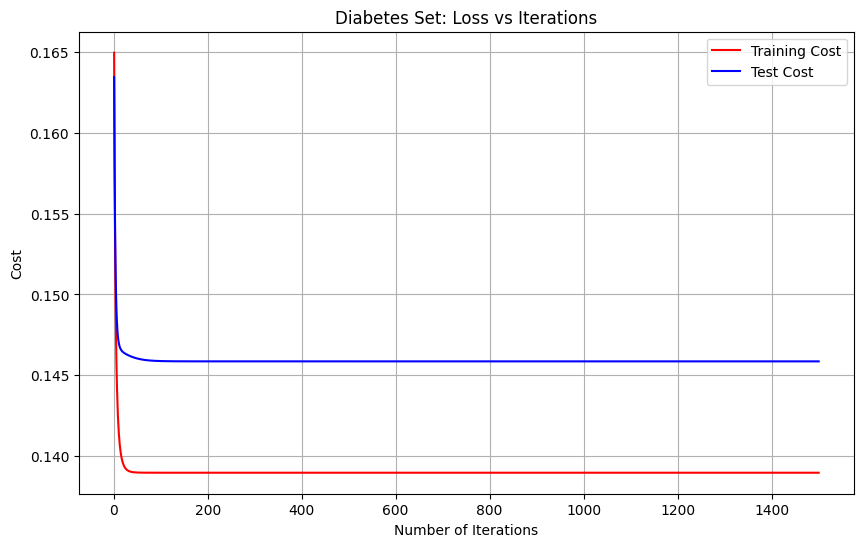

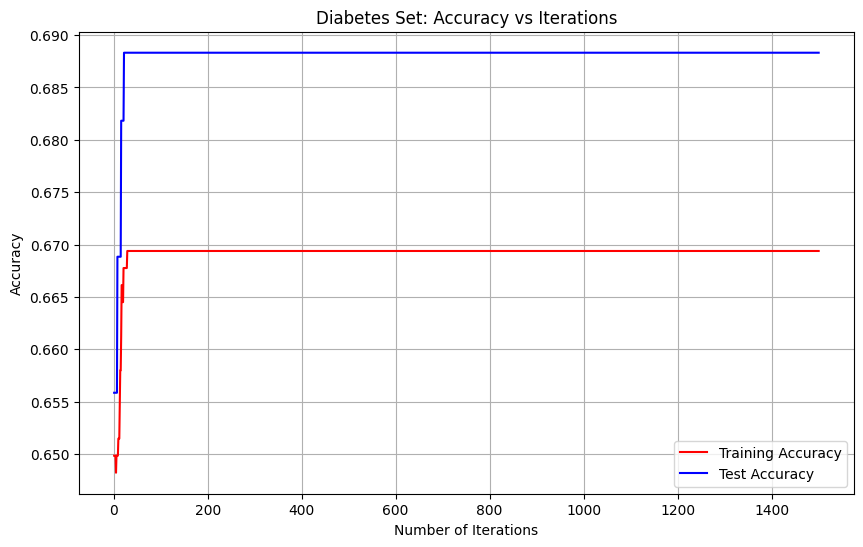

Results:

Accuracy: 0.7337662337662337
Precision: 0.6428571428571429
Recall: 0.5094339622641509
F1: 0.5684210526315789


In [205]:
theta = np.zeros(X1_train.shape[1])
iterations = 1500
alpha = 0.1
theta, train_cost_history, test_cost_history, train_accuracy_history, test_accuracy_history = gradient_descent(X1_train, Y1_train, X1_test, Y1_test, theta, alpha, iterations)

#Data Plot for Problem 1
plt.plot(range(1, iterations +1), train_cost_history, color = 'red', label = 'Training Cost')
plt.plot(range(1, iterations +1), test_cost_history, color = 'blue', label = 'Test Cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Diabetes Set: Loss vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(range(1, iterations +1), train_accuracy_history, color = 'red', label = 'Training Accuracy')
plt.plot(range(1, iterations +1), test_accuracy_history, color = 'blue', label = 'Test Accuracy')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Diabetes Set: Accuracy vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

Y1_predict = Dmodel.predict(X1_test)
print("Results:")
print("\nAccuracy:",metrics.accuracy_score(Y1_test, Y1_predict))
print("Precision:",metrics.precision_score(Y1_test, Y1_predict))
print("Recall:",metrics.recall_score(Y1_test, Y1_predict))
print("F1:",metrics.f1_score(Y1_test, Y1_predict))

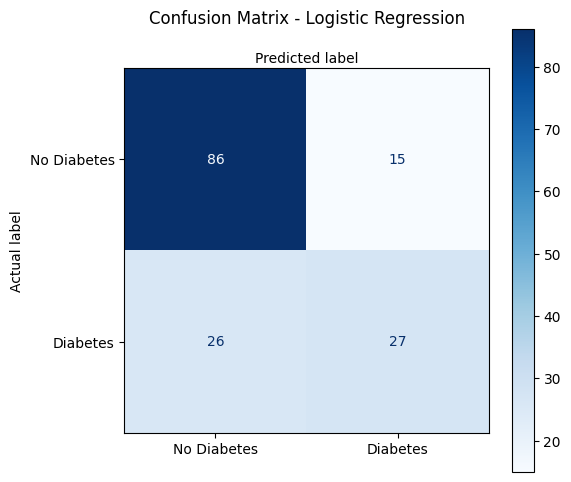

In [206]:
#Confusion Matrix for Problem 1
classification = ["No Diabetes", "Diabetes"]
cmatrix = confusion_matrix(Y1_test, Y1_predict)
fig, ax = plt.subplots(figsize=(6,5))
tick_marks = np.arange(len(classification))
plt.xticks(tick_marks, classification)
plt.yticks(tick_marks, classification)
ax.xaxis.set_label_position("top")
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=classification)
disp.plot(cmap='Blues', ax=ax)
plt.tight_layout()
plt.title("Confusion Matrix - Logistic Regression", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

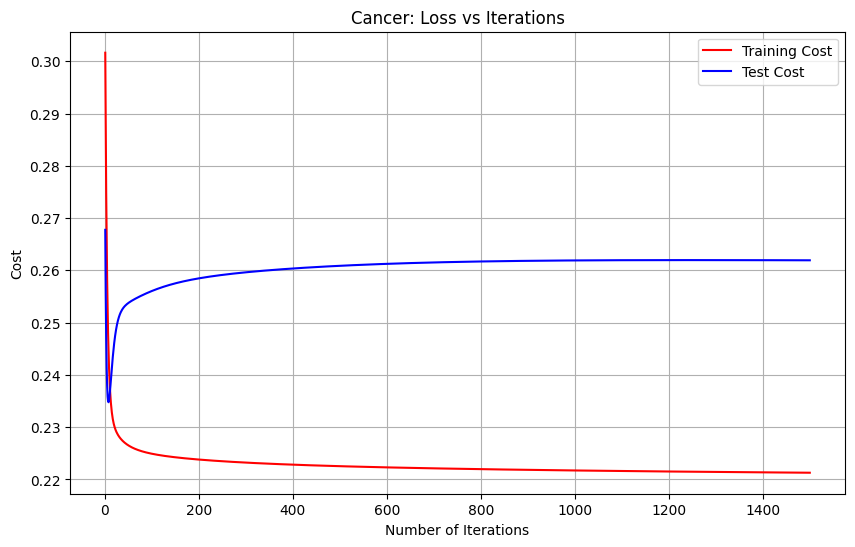

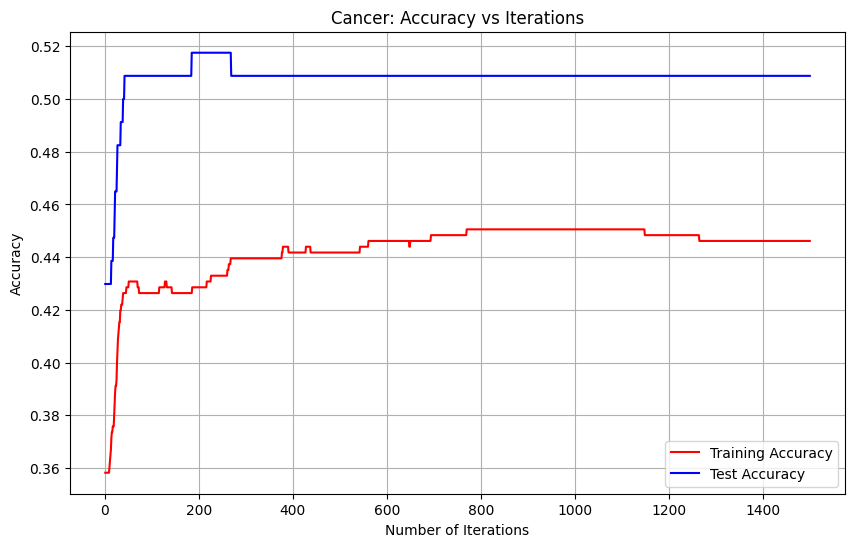

Results:

Accuracy: 0.9736842105263158
Precision: 0.9558823529411765
Recall: 1.0
F1: 0.9774436090225563


In [207]:
#Problem 2a - Cancer Dataset
X2 = cancer.data
Y2 = cancer.target

#Standardization
scaler_std_cancer = StandardScaler()
X2_scaled = scaler_std_cancer.fit_transform(X2)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_scaled, Y2, train_size=0.8, test_size=0.2, random_state=100)

#Create and train the model for Cancer
Cmodel = LogisticRegression(random_state=0)
Cmodel.fit(X2_train, Y2_train)

theta = np.zeros(X2_train.shape[1])
iterations = 1500
alpha = 0.01
theta, train_cost_history, test_cost_history, train_accuracy_history, test_accuracy_history = gradient_descent(X2_train, Y2_train, X2_test, Y2_test, theta, alpha, iterations)

#Data Plot for 2a
plt.plot(range(1, iterations +1), train_cost_history, color = 'red', label = 'Training Cost')
plt.plot(range(1, iterations +1), test_cost_history, color = 'blue', label = 'Test Cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cancer: Loss vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(range(1, iterations +1), train_accuracy_history, color = 'red', label = 'Training Accuracy')
plt.plot(range(1, iterations +1), test_accuracy_history, color = 'blue', label = 'Test Accuracy')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Cancer: Accuracy vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

Y2_predict = Cmodel.predict(X2_test)
print("Results:")
print("\nAccuracy:",metrics.accuracy_score(Y2_test, Y2_predict))
print("Precision:",metrics.precision_score(Y2_test, Y2_predict))
print("Recall:",metrics.recall_score(Y2_test, Y2_predict))
print("F1:",metrics.f1_score(Y2_test, Y2_predict))

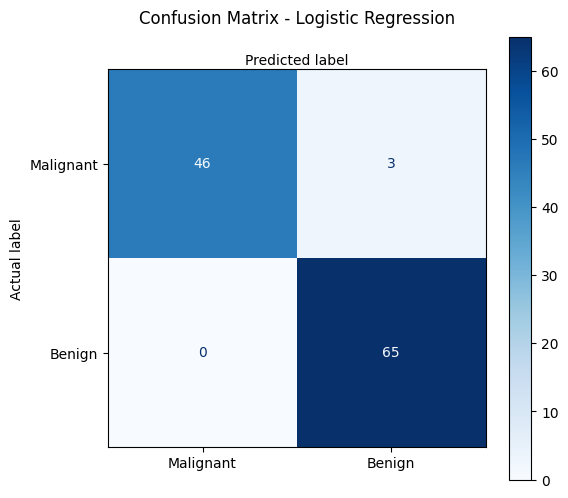

In [208]:
#Confusion Matrix for Problem 2a
classification = ["Malignant", "Benign"]
cmatrix = confusion_matrix(Y2_test, Y2_predict)
fig, ax = plt.subplots(figsize=(6,5))
tick_marks = np.arange(len(classification))
plt.xticks(tick_marks, classification)
plt.yticks(tick_marks, classification)
ax.xaxis.set_label_position("top")
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=classification)
disp.plot(cmap='Blues', ax=ax)
plt.tight_layout()
plt.title("Confusion Matrix - Logistic Regression", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

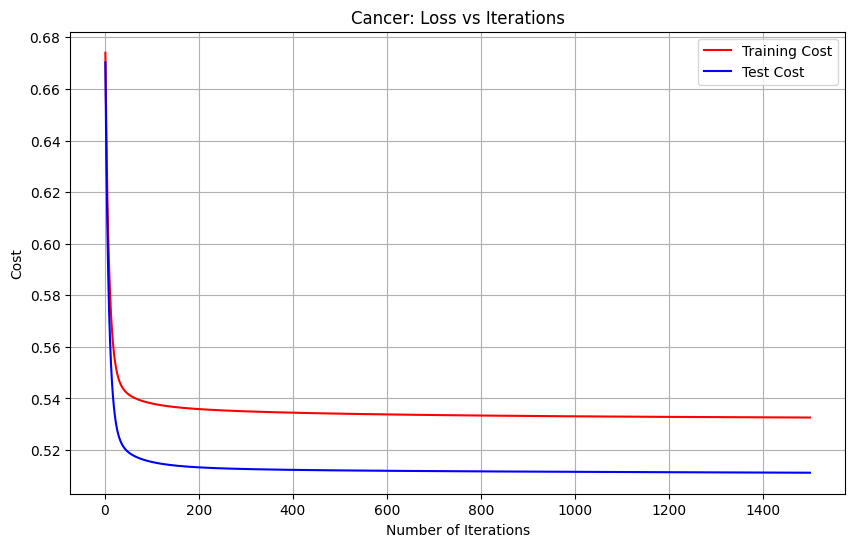

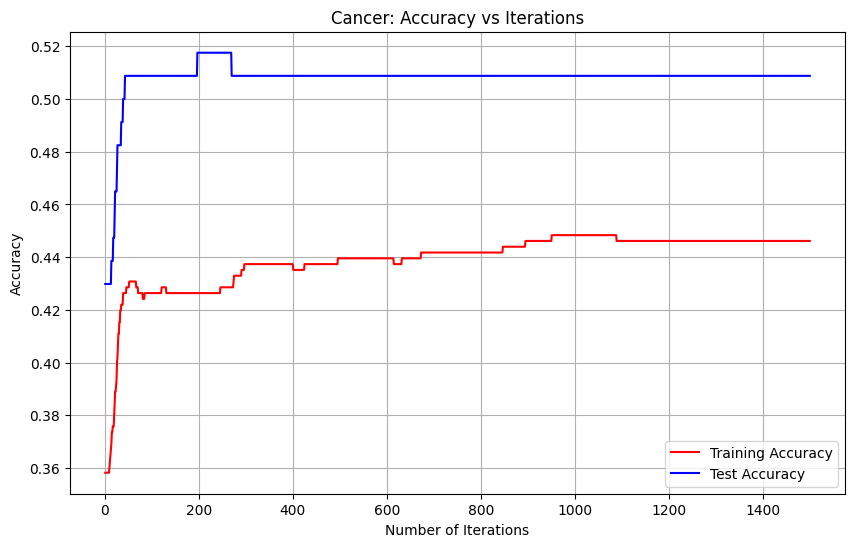

Results:

Accuracy: 0.9736842105263158
Precision: 0.9558823529411765
Recall: 1.0
F1: 0.9774436090225563


In [209]:
#Problem 2b
#Updated functions to help account for penalty
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    errors = predictions - y
    sqrErrors = np.square(errors)
    J = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return J

def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations, lam):
    m = len(y_train)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)
    train_accuracy_history = np.zeros(iterations)
    test_accuracy_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = np.subtract(predictions, y_train)
        sum_delta = (alpha / m) * X_train.transpose().dot(errors)
        sum_delta[1:] += (alpha * lam / m) * theta[1:]
        theta -= sum_delta
        train_cost_history[i] = compute_cost(X_train, y_train, theta) + (lam/(2*m)) * np.sum(theta[1:]**2)
        test_cost_history[i] = compute_cost(X_test, y_test, theta) + (lam/(2*m)) * np.sum(theta[1:]**2)
        train_accuracy_history[i] = compute_accuracy(X_train, y_train, theta)
        test_accuracy_history[i] = compute_accuracy(X_test, y_test, theta)

    return theta, train_cost_history, test_cost_history, train_accuracy_history, test_accuracy_history

#Standardization
scaler_std_cancer = StandardScaler()
X2_scaled = scaler_std_cancer.fit_transform(X2)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_scaled, Y2, train_size=0.8, test_size=0.2, random_state=100)

theta = np.zeros(X2_train.shape[1])
iterations = 1500
alpha = 0.01
lam = 10
theta, train_cost_history, test_cost_history, train_accuracy_history, test_accuracy_history = gradient_descent(X2_train, Y2_train, X2_test, Y2_test, theta, alpha, iterations, lam)

#Data Plot for 2b
plt.plot(range(1, iterations +1), train_cost_history, color = 'red', label = 'Training Cost')
plt.plot(range(1, iterations +1), test_cost_history, color = 'blue', label = 'Test Cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cancer: Loss vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(range(1, iterations +1), train_accuracy_history, color = 'red', label = 'Training Accuracy')
plt.plot(range(1, iterations +1), test_accuracy_history, color = 'blue', label = 'Test Accuracy')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Cancer: Accuracy vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

Y2_predict = Cmodel.predict(X2_test)
print("Results:")
print("\nAccuracy:",metrics.accuracy_score(Y2_test, Y2_predict))
print("Precision:",metrics.precision_score(Y2_test, Y2_predict))
print("Recall:",metrics.recall_score(Y2_test, Y2_predict))
print("F1:",metrics.f1_score(Y2_test, Y2_predict))

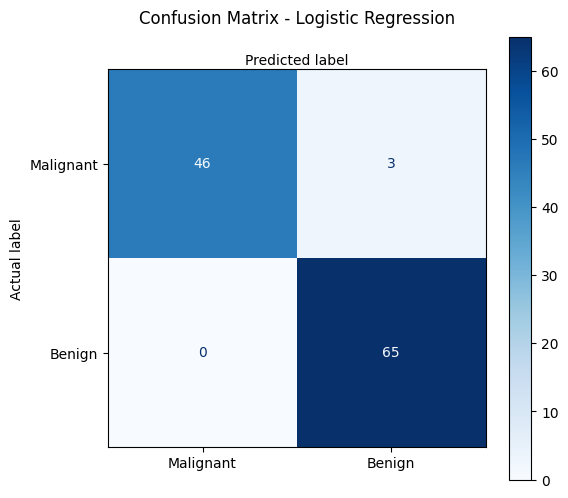

In [210]:
#Confusion Matrix for Problem 2b
classification = ["Malignant", "Benign"]
cmatrix = confusion_matrix(Y2_test, Y2_predict)
fig, ax = plt.subplots(figsize=(6,5))
tick_marks = np.arange(len(classification))
plt.xticks(tick_marks, classification)
plt.yticks(tick_marks, classification)
ax.xaxis.set_label_position("top")
disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=classification)
disp.plot(cmap='Blues', ax=ax)
plt.tight_layout()
plt.title("Confusion Matrix - Logistic Regression", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()